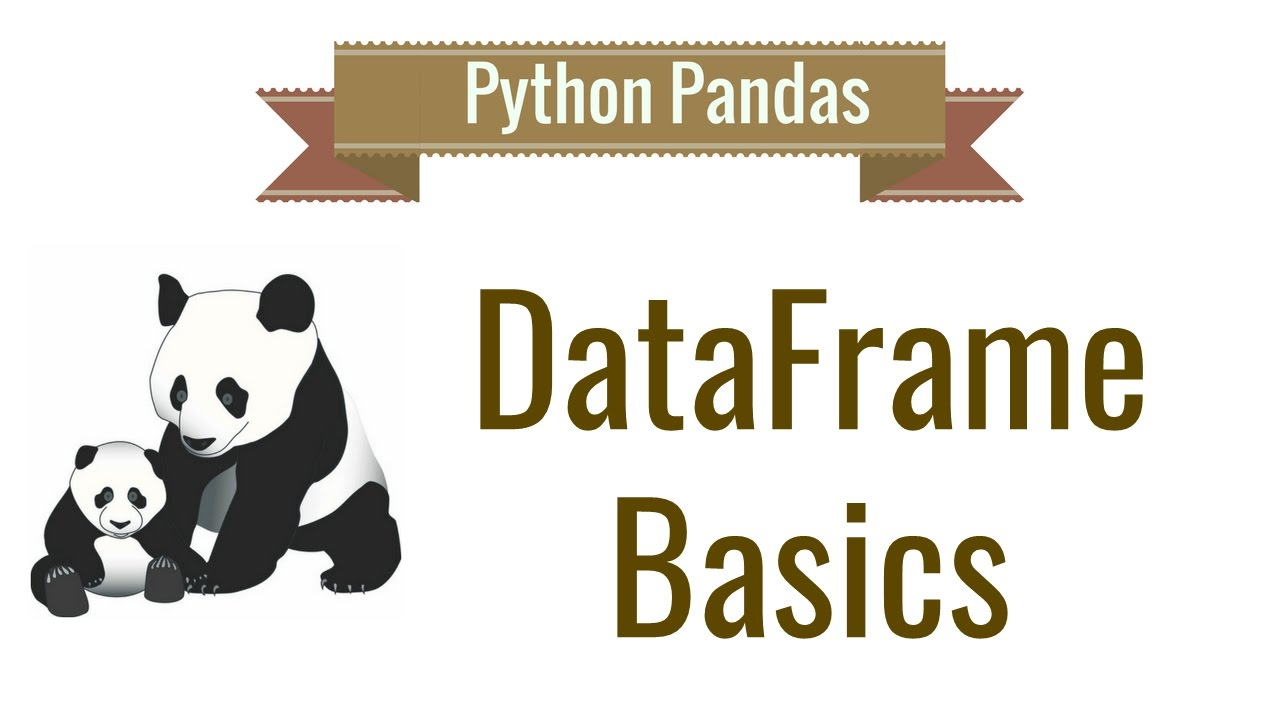

pandas — программная библиотека на языке Python для обработки и анализа данных.

### Основные возможности библиотеки:

* Объект DataFrame для манипулирования индексированными массивами двумерных данных
* Инструменты для обмена данными между структурами в памяти и файлами различных форматов
* Cпособы обработки отсутствующей информации
* Переформатирование наборов данных, в том числе создание сводных таблиц
* Срез данных по значениям индекса, расширенные возможности индексирования, выборка из больших наборов данных
* Вставка и удаление столбцов данных
* Возможности группировки
* Слияние и объединение наборов данных
* Работа с временными рядами: формирование временных периодов и изменение интервалов и так далее

### Главные струкруры данных:


  * **DataFrame**, таблици с колонками и рядами 
  * **Series**, одна колонка. В DataFrame их несколько 

#### Установка 

In [1]:
!pip install pandas

### Использование 

In [2]:
import numpy as np
import pandas as pd

### Cоздание Series 

In [3]:
cities = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

In [4]:
cities

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

### Cоздание DataFrame 

Есть несколько способов создать обьект DataFrame: 
* из списков Python 
* из Обьектов Series
* из словаря (словарей)
* используя namedtuple обьекты
* счититывание файла 

###### Из списков

In [5]:
city_names = ['San Francisco', 'San Jose', 'Sacramento']
population = [852469, 1015785, 485199]

pd.DataFrame([city_names, population])

,0,1,2
0,San Francisco,San Jose,Sacramento
1,852469,1015785,485199


In [6]:
pd.DataFrame([city_names, population]).transpose()

,0,1
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [7]:
a=pd.DataFrame([city_names, population]).transpose()
a.columns=['City', 'Population']
a

,City,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [8]:
a=pd.DataFrame([city_names, population]).transpose()
a.columns=['City', 'Population']
a.index='a b c'.split()
a

,City,Population
a,San Francisco,852469
b,San Jose,1015785
c,Sacramento,485199


###### Из словарей

In [9]:
pd.DataFrame({'City name': city_names, 
              'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


###### Используя Series

In [10]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({'City name': city_names, 
              'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


###### Чтение файлов

In [11]:
pd.read_csv('sample.csv')

,Unnamed: 0,City name,Population,Country
0,0,San Francisco,852469,USA
1,1,San Jose,1015785,UK
2,2,Sacramento,485199,AU


In [12]:
pd.read_excel('sample.xlsx')

,City name,Population,Country
0,San Francisco,852469,USA
1,San Jose,1015785,UK
2,Sacramento,485199,AU


In [13]:
pd.read_json('sample.json')

,City name,Population,Country
0,San Francisco,852469,USA
1,San Jose,1015785,UK
2,Sacramento,485199,AU


In [14]:
pd.read_html('https://www.geeksforgeeks.org/data-types-in-c/')[0]

,Data Type,Memory (bytes),Range,Format Specifier
0,short int,2,"-32,768 to 32,767",%hd
1,unsigned short int,2,"0 to 65,535",%hu
2,unsigned int,4,"0 to 4,294,967,295",%u
3,int,4,"-2,147,483,648 to 2,147,483,647",%d
4,long int,4,"-2,147,483,648 to 2,147,483,647",%ld
5,unsigned long int,4,"0 to 4,294,967,295",%lu
6,long long int,8,-(2^63) to (2^63)-1,%lld
7,unsigned long long int,8,"0 to 18,446,744,073,709,551,615",%llu
8,signed char,1,-128 to 127,%c
9,unsigned char,1,0 to 255,%c


In [15]:
pd.read_hdf('sample.h5', 'cities')

,City name,Population,Country
0,San Francisco,852469,USA
1,San Jose,1015785,UK
2,Sacramento,485199,AU


In [16]:
from sqlalchemy import create_engine
disk_engine = create_engine('sqlite:///sample.db')

In [17]:
pd.read_sql('cities', disk_engine)

,index,City name,Population
0,0,San Francisco,852469
1,1,San Jose,1015785
2,2,Sacramento,485199


### Выборка из  DataFrame 

##### Выбор колонки/колонок

In [18]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population, 'Country':['USA', 'UK', 'AU'] })
cities['City name']

0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [19]:
cities[['City name', 'Country']]

,City name,Country
0,San Francisco,USA
1,San Jose,UK
2,Sacramento,AU


In [20]:
cities.filter(items=['City name', 'Population'])

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [21]:
cities.filter(regex='ion$', axis=1)

,Population
0,852469
1,1015785
2,485199


In [22]:
cities.filter(like='name', axis=1)

,City name
0,San Francisco
1,San Jose
2,Sacramento


##### Выбор ряда\рядов

In [23]:
cities.index='a b c'.split()

In [24]:
cities

,City name,Population,Country
a,San Francisco,852469,USA
b,San Jose,1015785,UK
c,Sacramento,485199,AU


In [25]:
cities.loc['a']

City name     San Francisco
Population           852469
Country                 USA
Name: a, dtype: object

In [26]:
cities.iloc[0]

City name     San Francisco
Population           852469
Country                 USA
Name: a, dtype: object

In [27]:
cities.iloc[0:2]

,City name,Population,Country
a,San Francisco,852469,USA
b,San Jose,1015785,UK


In [28]:
cities.filter(like='a', axis=0)

,City name,Population,Country
a,San Francisco,852469,USA


##### И колонка и ряд

In [29]:
cities['City name'][1]

'San Jose'

In [30]:
cities=cities.reset_index()

In [31]:
cities.at[1,'Country']

'UK'

In [32]:
cities

,index,City name,Population,Country
0,a,San Francisco,852469,USA
1,b,San Jose,1015785,UK
2,c,Sacramento,485199,AU


In [33]:
cities.iat[1,2]

1015785

##### Advanced

In [ ]:
cities[cities['Population']>852469]

In [ ]:
cities[(cities['Population']>852469)&(cities['Country']=='UK')]

In [ ]:
cities.query('Population > 852469')

In [ ]:
cities.query('Population > 852469 & Country=="UK"')

In [ ]:
cities.where(cities < 852469)

In [ ]:
cities

### Сортировка DataFrame 

In [ ]:
city_names = pd.Series(['San Francisco', 
                        'Kiev', 
                        'Paris', 
                        'Lviv', 
                        'Aachen',
                        'Florence'])

population = pd.Series([852469, 
                        1015785, 
                        485199,
                        3455353,
                        35345,
                        35345,])

cities=pd.DataFrame({'City name': city_names, 
              'Population': population })

In [ ]:
cities

In [ ]:
cities.sort_values(['City name'])

In [ ]:
cities.sort_index()

### Манипулирование DataFrame 

In [ ]:
import numpy as np

In [ ]:
a=np.linspace(0,100,100)
b=np.linspace(0,100,100)
c=np.linspace(0,100,100)
d=np.linspace(0,100,100)

dt={
    'a':a,
    'b':b,
    'c':c,
    'd':d,
}

df=pd.DataFrame(dt)

In [ ]:
df

In [ ]:
df.head()

In [ ]:
a=df['a']*100
a.head()

In [ ]:
a=df['a']+50
a.head()

In [ ]:
a=df['a']**5
a.head()

In [ ]:
a=np.log(df['a'][1:])
a.head()

In [ ]:
df['a'].mean()

In [ ]:
df['a'].min()

In [ ]:
df['a'].std()

In [ ]:
df['a'].max()

In [ ]:
df['a'].median()

In [ ]:
df['a'].var()

In [ ]:
df['a'].quantile([0.25, 0.75])

In [ ]:
df['a'].cov(df['b'])

In [ ]:
df['a'].corr(df['b'])

In [ ]:
df.describe()

In [ ]:
df['b'].cumsum().head()

In [ ]:
df['b'].rolling(window=60,  min_periods=1).sum().head()

In [ ]:
df['a+b']=df['a']+df['b']

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df['Country']=['UK', 'UA', 'AU', 'FR', 'GE']*20

In [ ]:
df.head()

In [ ]:
df['Country'].value_counts(dropna=False) 

In [ ]:
df.groupby(['Country']).sum()

In [ ]:
df['City']='A B C D E F G H I J'.split()*10

In [ ]:
df.head()

In [ ]:
df.groupby(['Country', 'City']).sum()

In [ ]:
df.groupby(['Country', 'City']).agg(['sum','mean','max'])

In [ ]:
df.agg({'a' : ['sum', 'min'], 'b' : ['min', 'max']})

In [ ]:
df.agg({'a' :{'a_summ':'sum', 
              'a_min':'min'}, 
        'b' : {'b_min':'min',
               'b_max':'max'}})

In [ ]:
df['a'].apply(lambda val: val > 50)

**для DataFrames**

In [ ]:
df2=df*2

In [ ]:
df3=df+df2
df3.head()

In [ ]:
df.add(df2).head()

In [ ]:
df2['a b c d'.split()].mul(df['a b c d'.split()]).head()

In [ ]:
dfk = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
s = pd.Series([1, 1, 2, 1])
dfk.dot(s)

### Отсутствующие данные 

In [ ]:
df['nan_1']=[1,2,3,4,5,np.nan, 7,8,9, np.nan]*10
df['nan_3']=[1,np.nan, 2,3,np.nan,4,5, 7,8,9]*10
df['nan_2']=[1,2,3,4,5,np.nan, 7,8,9, np.nan]*10

In [ ]:
df.head(15)

##### Пропускать ряды, колонки 

In [ ]:
df.dropna(how='any', axis=0).head(15)

In [ ]:
df.dropna(how='any', axis=1).head(15)

In [ ]:
df.dropna(thresh=10, axis=0).head(15)

##### Заполнить пропуски  

In [ ]:
df.fillna(0).head(15)

In [ ]:
df.fillna(method='ffill').head(15)

In [ ]:
df.fillna(method='bfill').head(15)

### Изменение формы

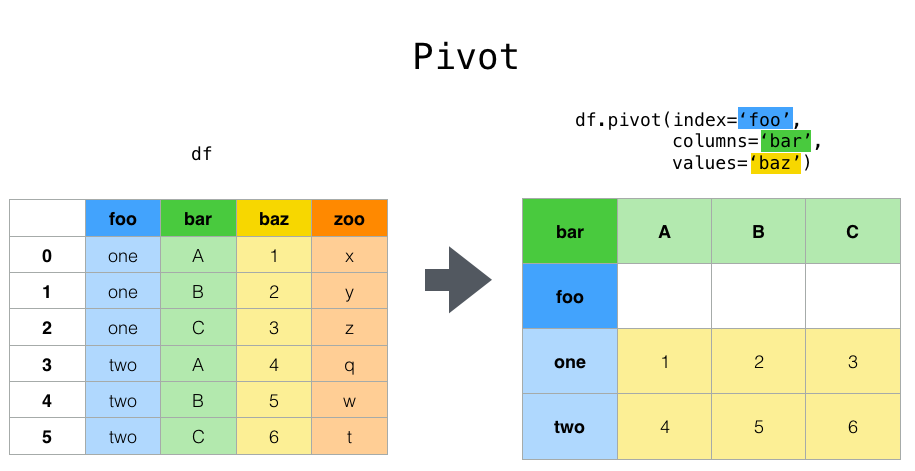

In [ ]:
df1 = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [ ]:
df1

In [ ]:
df1.pivot(index='bar', columns='zoo', values='baz')

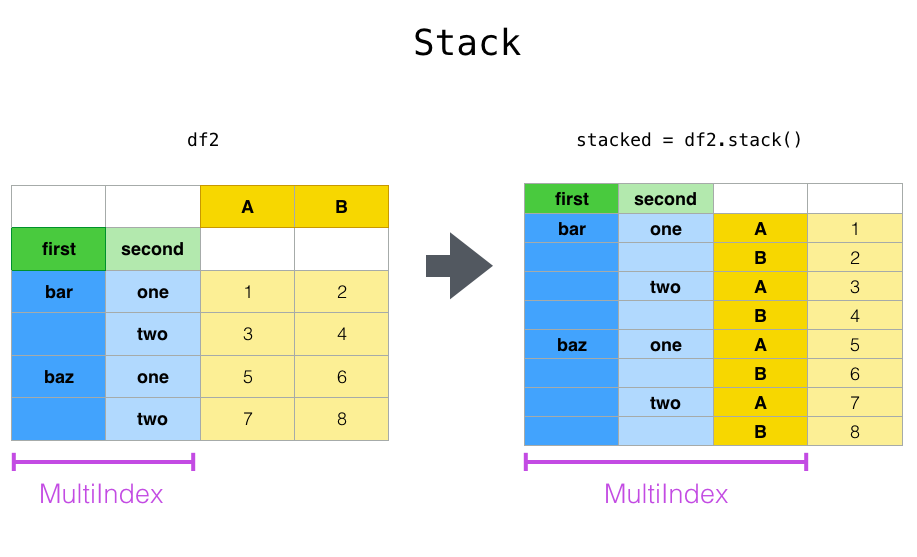

In [ ]:
header = pd.MultiIndex.from_product([['Semester1','Semester2'],
                                     ['Maths','Science']])
d=([[12,45,67,56],[78,89,45,67],[45,67,89,90],[67,44,56,55]])
 
dfw = pd.DataFrame(d,
                  index=['Alisa','Bobby','Cathrine','Jack'],
                  columns=header)
dfw

In [ ]:
dfw=dfw.stack()

In [ ]:
dfw

In [ ]:
dfw.unstack()

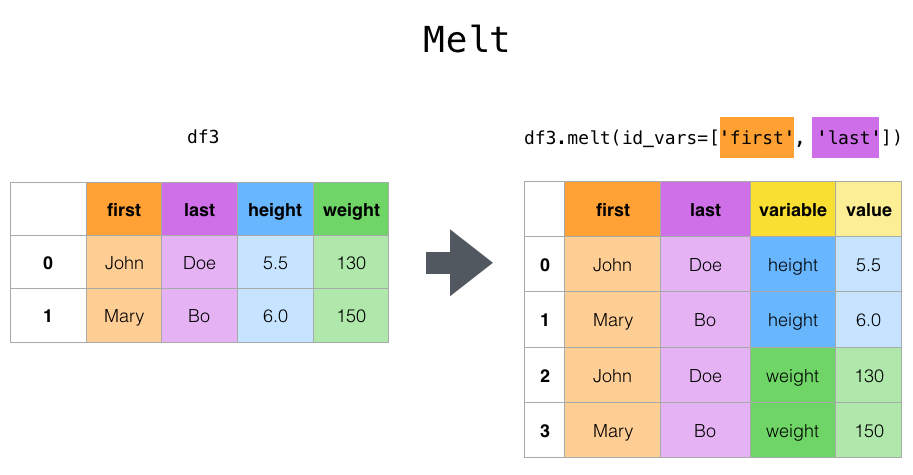

In [ ]:
dfd = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
dfd 

In [ ]:
dfd.melt( id_vars =['Name']) 

### Обьединение 

##### Merge

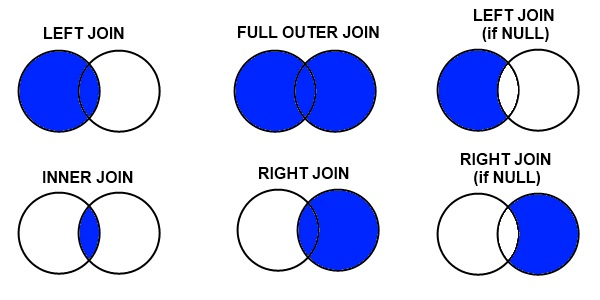

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                     'value': [5, 6, 7, 8]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.merge(df2, on='value', how='outer')

In [ ]:
df1.merge(df2, on='value', how='inner')

In [ ]:
df1.merge(df2, on='value', how='left')

In [ ]:
df1.merge(df2, on='value', how='right')

#### Join

In [ ]:
df1.join(df2, lsuffix='_l')

##### Concat

In [ ]:
pd.concat([df1, df2])

### Visualisation

In [ ]:
df['a'].plot()

In [ ]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, 
                   columns=['a', 'b', 'c'])

df4['a'].plot.hist(alpha=0.5)

In [ ]:
df4['a'].plot(kind='hist', alpha=0.5)

In [ ]:
df4.plot.scatter(x='a', y='b');

In [ ]:
series = pd.Series(3 * np.random.rand(4),
                   index=['a', 'b', 'c', 'd'], name='series')

In [ ]:
series.plot.pie(figsize=(6, 6))

In [ ]:
df5 = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df5['b'] = df5['b'] + np.arange(1000)
df5.plot.hexbin(x='a', y='b', gridsize=25)

In [ ]:
df6 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df6.plot.area()

In [ ]:
df6.plot.area(subplots=True)

In [ ]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

In [ ]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

In [ ]:
df6.plot(x='a', 
         y='c',
         kind='scatter',
         title='Sample',
         figsize=(5,5))

### Saving pandas DataFrames

In [ ]:
cities.to_csv('sample.csv')

In [ ]:
cities.to_excel('sample.xlsx')

In [ ]:
cities.to_json('sample.json')

In [ ]:
cities.to_hdf('sample.h5', 'cities')

In [ ]:
cities.to_sql('a', 
         disk_engine, 
         if_exists='append')